#  Exploratory data analysis
made by: Fernando Ferreira\
github: fernando-ff


## Importing and reading data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

ratingsDF = pd.read_csv("./movie-lens/ratings.csv")
moviesDF = pd.read_csv("./movie-lens/movies.csv")
tmdbDF = pd.read_csv('./tmdb-500/tmdb_5000_movies.csv')

## 1-  Analysing ratings DF

#### Showing the five first rows of ratings Data Frame

In [2]:
ratingsDF.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Row and columns quantite

In [3]:
ratingsDF.shape

(100836, 4)

#### Taking the unique values in rating label

In [4]:
ratingsDF['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### Taking the value quantite each unique

In [5]:
ratingsDF['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

#### Taking the mean of the rating label

In [6]:
ratingsDF['rating'].mean()

3.501556983616962

#### Ploting histogram graphic with the ratings

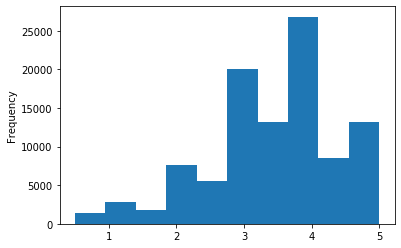

In [7]:
ratingsDF.rating.plot(kind='hist')

#### Taking the median

In [8]:
ratingsDF.rating.median()

3.5

#### Taking a describtion about the rating Data Frame

In [9]:
ratingsDF.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

#### Ploting Boxplot of rating DF

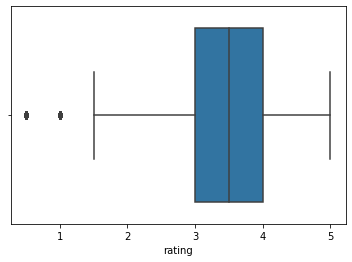

In [10]:

sns.boxplot(ratingsDF.rating)

## 2 - alanysing movies rating

#### Showing the five first rows

In [12]:
moviesDF.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Taking all ratings and agruping by label movieId

In [9]:
group_rating_movie = ratingsDF.groupby("movieId").rating


<bound method GroupBy.head of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7efd02581a10>>

###  mean by movie 

In [14]:
mean_by_movie = group_rating_movie.mean()
mean_by_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

### Ploting historgram graphic

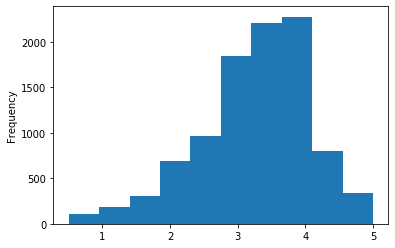

In [15]:
mean_by_movie.plot(kind='hist')

### Ploting boxplot graphic

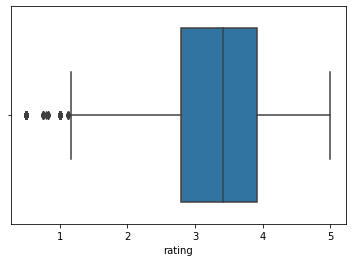

In [16]:
sns.boxplot(mean_by_movie)

### Mean by movie description

In [17]:
mean_by_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

## 3 - Analysing tmdb 500 data set

In [19]:
tmdbDF.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### classifing variable original language

original langue - categorical nominal variable

In [20]:
tmdbDF.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
serie_original_value = tmdbDF["original_language"]

In [22]:
df_original_value  = serie_original_value.value_counts().to_frame().reset_index()
df_original_value.head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [23]:
df_original_value.columns = ["original_language", "total"]

In [24]:
df_original_value.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


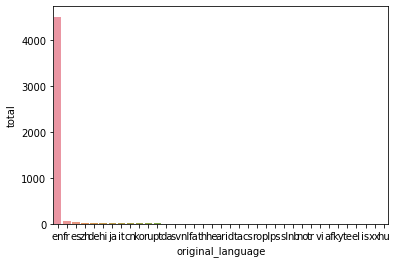

In [25]:
sns.barplot(x="original_language", y="total", data=df_original_value)

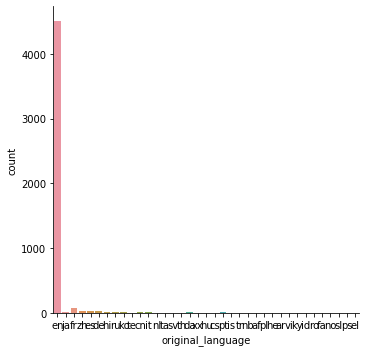

In [26]:
sns.catplot(x="original_language", kind="count", data = tmdbDF)

([<matplotlib.patches.Wedge at 0x7f2b5fcae190>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

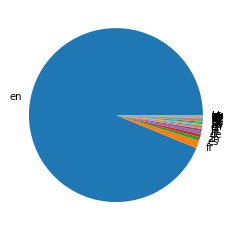

In [27]:
plt.pie(df_original_value["total"], labels=df_original_value["original_language"])

In [28]:
total_by_language = tmdbDF["original_language"].value_counts()
general_total = total_by_language.sum()
en_language_total = total_by_language.loc["en"]
rest_total = general_total - en_language_total
print(en_language_total, rest_total)

4505 298


In [29]:
data = {
    'language': ['english', 'others'],
    'total': [en_language_total, rest_total]
}
data

{'language': ['english', 'others'], 'total': [4505, 298]}

In [30]:
data = pd.DataFrame(data)
data

,language,total
0,english,4505
1,others,298


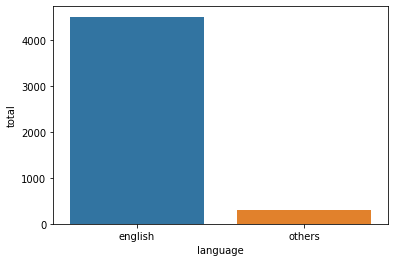

In [31]:
sns.barplot(x="language",y= "total", data = data)

In [32]:
original_language_different_english = tmdbDF.query("original_language != 'en'")

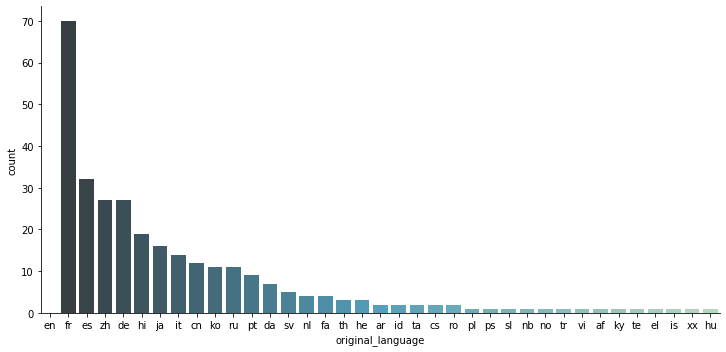

In [39]:
sns.catplot( x = "original_language", 
             kind="count", 
             data=original_language_different_english, 
             aspect= 2,
             order= total_by_language.index,
             palette="GnBu_d"
           )

In [10]:
toy_story_ratings = ratingsDF.query("movieId== 1")
jumanji_ratings = ratingsDF.query("movieId== 2")
print(len(toy_story_ratings), len(jumanji_ratings))

215 110


In [15]:
print("Toy story ratings mean %.2f" % toy_story_ratings.rating.mean())
print("Jumanji ratings mean %.2f" %jumanji_ratings.rating.mean())

Toy story ratings mean 3.92
Jumanji ratings mean 3.43


In [25]:
print("Toy story ratings median %.2f" % toy_story_ratings.rating.median())
print("Jumanji ratings median %.2f" %jumanji_ratings.rating.median())

Toy story ratings median 4.00
Jumanji ratings median 3.50


In [22]:
print("Toy story ratings std %.2f" % toy_story_ratings.rating.std())
print("Jumanji ratings std %.2f" %jumanji_ratings.rating.std())

Toy story ratings std 0.83
Jumanji ratings std 0.88
